# Python Web Frameworks
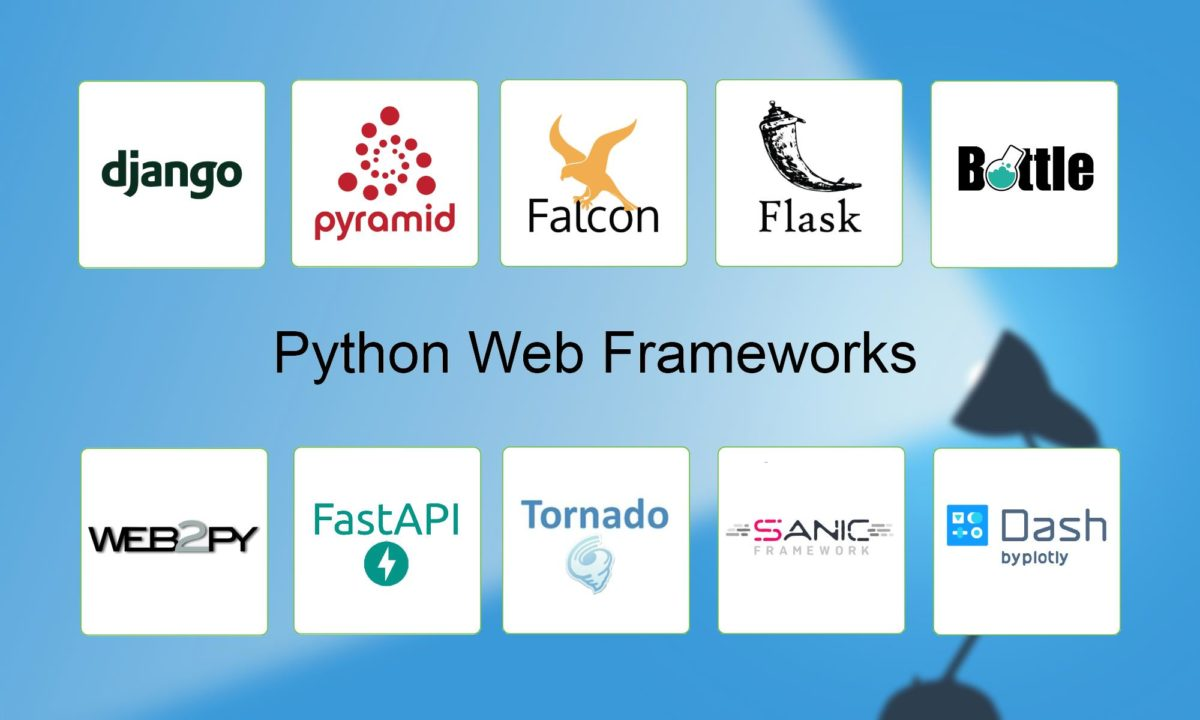

In [24]:
import pandas as pd
import numpy as np

In [25]:
dataset=pd.read_csv('cardio_dataset.csv').values

In [26]:
data=dataset[:,0:7]
target=dataset[:,7]

In [27]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=7, activation='sigmoid',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1024      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9941 (38.83 KB)
Trainable params: 9941 (

In [30]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self,epoch,logs=None):
        predicted_result=model.predict(test_data)
        r2=r2_score(test_target,predicted_result)
        print('epoch ',epoch,'- r2 score:',r2)

[Full details at keras official site](https://www.tensorflow.org/guide/keras/custom_callback)

In [31]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('models/model-{epoch:03d}.h5', monitor='val_loss', save_best_only=True, mode='auto')


In [32]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
164/167 [============================>.] - ETA: 0s - loss: 0.0535 - mse: 0.0535 - mae: 0.1759

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  0 - r2 score: -0.03291652042791782
167/167 [==============================] - 3s 7ms/step - loss: 0.0531 - mse: 0.0531 - mae: 0.1752 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.1334
Epoch 2/200
42/42 [==============================] - 0s 1ms/step loss: 0.0264 - mse: 0.0264 - mae: 0.12
epoch  1 - r2 score: 0.036578207880419655
167/167 [==============================] - 1s 6ms/step - loss: 0.0266 - mse: 0.0266 - mae: 0.1239 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1231


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/200
42/42 [==============================] - 0s 2ms/step loss: 0.0243 - mse: 0.0243 - mae: 0.
epoch  2 - r2 score: 0.04847481335215864
167/167 [==============================] - 1s 6ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.1188 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.1169


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/200
42/42 [==============================] - 0s 2ms/step loss: 0.0233 - mse: 0.0233 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  3 - r2 score: 0.06105030848258608
167/167 [==============================] - 1s 6ms/step - loss: 0.0233 - mse: 0.0233 - mae: 0.1162 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.1223
Epoch 5/200
42/42 [==============================] - 0s 2ms/step loss: 0.0217 - mse: 0.0217 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  4 - r2 score: 0.12284531779058827
167/167 [==============================] - 1s 5ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1123 - val_loss: 0.0219 - val_mse: 0.0219 - val_mae: 0.1178
Epoch 6/200
23/42 [===============>..............] - ETA: 0s0s - loss: 0.0209 - mse: 0.0209 - mae: 0.10

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  5 - r2 score: 0.2696749130015893
167/167 [==============================] - 1s 6ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1083 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.1042
Epoch 7/200
31/42 [=====================>........] - ETA: 0s0s - loss: 0.0179 - mse: 0.0179 - mae: 0.09

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  6 - r2 score: 0.47226491615443256
167/167 [==============================] - 1s 5ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.0992 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0908
Epoch 8/200
42/42 [==============================] - 0s 2ms/step loss: 0.0153 - mse: 0.0153 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  7 - r2 score: 0.5653022827825664
167/167 [==============================] - 1s 6ms/step - loss: 0.0152 - mse: 0.0152 - mae: 0.0902 - val_loss: 0.0109 - val_mse: 0.0109 - val_mae: 0.0810
Epoch 9/200
42/42 [==============================] - 0s 2ms/step loss: 0.0129 - mse: 0.0129 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  8 - r2 score: 0.6488865555093521
167/167 [==============================] - 1s 6ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0824 - val_loss: 0.0088 - val_mse: 0.0088 - val_mae: 0.0647
Epoch 10/200
42/42 [==============================] - 0s 2ms/step loss: 0.0121 - mse: 0.0121 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  9 - r2 score: 0.6864749019113461
167/167 [==============================] - 1s 5ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0791 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0612
Epoch 11/200
26/42 [=================>............] - ETA: 0s0s - loss: 0.0110 - mse: 0.0110 - mae: 0.07

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  10 - r2 score: 0.7053942056495792
167/167 [==============================] - 1s 4ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0738 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0610
Epoch 12/200
42/42 [==============================] - 0s 2ms/step loss: 0.0103 - mse: 0.0103 - mae: 0.
epoch  11 - r2 score: 0.7358168369348006
167/167 [==============================] - 1s 5ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0715 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0518


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 13/200
25/42 [================>.............] - ETA: 0s0s - loss: 0.0094 - mse: 0.0094 - mae: 0.06

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  12 - r2 score: 0.765867320925725
167/167 [==============================] - 1s 5ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0680 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0525
Epoch 14/200
42/42 [==============================] - 0s 2ms/step loss: 0.0095 - mse: 0.0095 - mae: 0.
epoch  13 - r2 score: 0.7504166530612553
167/167 [==============================] - 1s 6ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0674 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0479
Epoch 15/200
42/42 [==============================] - 0s 2ms/step loss: 0.0085 - mse: 0.0085 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  14 - r2 score: 0.771429557512561
167/167 [==============================] - 1s 6ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0632 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0475
Epoch 16/200
42/42 [==============================] - 0s 2ms/step loss: 0.0085 - mse: 0.0085 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  15 - r2 score: 0.7746548023410079
167/167 [==============================] - 1s 6ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0635 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0473
Epoch 17/200
42/42 [==============================] - 0s 2ms/step loss: 0.0078 - mse: 0.0078 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  16 - r2 score: 0.8015637855528481
167/167 [==============================] - 1s 5ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0601 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0474
Epoch 18/200
23/42 [===============>..............] - ETA: 0s0s - loss: 0.0078 - mse: 0.0078 - mae: 0.05

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 3ms/step
epoch  17 - r2 score: 0.8059181178218605
167/167 [==============================] - 1s 5ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0598 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0498
Epoch 19/200
26/42 [=================>............] - ETA: 0s0s - loss: 0.0072 - mse: 0.0072 - mae: 0.05

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  18 - r2 score: 0.8209667078112857
167/167 [==============================] - 1s 7ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0575 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0438
Epoch 20/200
42/42 [==============================] - 0s 2ms/step loss: 0.0076 - mse: 0.0076 - mae: 0.
epoch  19 - r2 score: 0.799798586987329
167/167 [==============================] - 1s 6ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0591 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0469
Epoch 21/200
42/42 [==============================] - 0s 2ms/step loss: 0.0073 - mse: 0.0073 - mae: 0.
epoch  20 - r2 score: 0.8167032179086509
167/167 [==============================] - 1s 5ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0568 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0484
Epoch 22/200
42/42 [==============================] - 0s 2ms/step loss: 0.0069 - mse: 0.0069 - mae: 0.
epoch  21 - r2 score: 0.8120167391276701
167/167 [=======

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  22 - r2 score: 0.8225320440751723
167/167 [==============================] - 1s 6ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0540 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0419
Epoch 24/200
42/42 [==============================] - 0s 2ms/step loss: 0.0069 - mse: 0.0069 - mae: 0.
epoch  23 - r2 score: 0.8271694701189849
167/167 [==============================] - 1s 5ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0550 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0401


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25/200
42/42 [==============================] - 0s 2ms/step loss: 0.0064 - mse: 0.0064 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  24 - r2 score: 0.8274671365115137
167/167 [==============================] - 1s 6ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0534 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0407
Epoch 26/200
42/42 [==============================] - 0s 2ms/step loss: 0.0063 - mse: 0.0063 - mae: 0.
epoch  25 - r2 score: 0.8234013522280509
167/167 [==============================] - 1s 5ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0526 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0397
Epoch 27/200
42/42 [==============================] - 0s 2ms/step loss: 0.0062 - mse: 0.0062 - mae: 0.
epoch  26 - r2 score: 0.8300352464306961
167/167 [==============================] - 1s 5ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0522 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0438


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28/200
42/42 [==============================] - 0s 2ms/step loss: 0.0062 - mse: 0.0062 - mae: 0.
epoch  27 - r2 score: 0.8295076422180525
167/167 [==============================] - 1s 5ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0521 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0429
Epoch 29/200
28/42 [===================>..........] - ETA: 0s0s - loss: 0.0060 - mse: 0.0060 - mae: 0.05

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  28 - r2 score: 0.8357637618568794
167/167 [==============================] - 1s 6ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0509 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0426
Epoch 30/200
42/42 [==============================] - 0s 2ms/step loss: 0.0061 - mse: 0.0061 - mae: 0.
epoch  29 - r2 score: 0.8073601823056002
167/167 [==============================] - 1s 5ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0512 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0413
Epoch 31/200
42/42 [==============================] - 0s 2ms/step loss: 0.0058 - mse: 0.0058 - mae: 0.
epoch  30 - r2 score: 0.8383558532766231
167/167 [==============================] - 1s 5ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0505 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0397


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32/200
42/42 [==============================] - 0s 2ms/step loss: 0.0057 - mse: 0.0057 - mae: 0.
epoch  31 - r2 score: 0.8217695720088102
167/167 [==============================] - 1s 5ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0499 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0423
Epoch 33/200
42/42 [==============================] - 0s 2ms/step loss: 0.0056 - mse: 0.0056 - mae: 0.
epoch  32 - r2 score: 0.8379227133434383
167/167 [==============================] - 1s 5ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0495 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0412
Epoch 34/200
42/42 [==============================] - 0s 2ms/step loss: 0.0057 - mse: 0.0057 - mae: 0.
epoch  33 - r2 score: 0.8271929639833441
167/167 [==============================] - 1s 4ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0502 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0454
Epoch 35/200
42/42 [==============================] - 0s 2ms/step loss: 0.0058 - mse: 0.0058 - mae: 0.


C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  34 - r2 score: 0.8390980711641626
167/167 [==============================] - 1s 6ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0503 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0386
Epoch 36/200
42/42 [==============================] - 0s 2ms/step loss: 0.0056 - mse: 0.0056 - mae: 0.
epoch  35 - r2 score: 0.8309937721576206
167/167 [==============================] - 1s 5ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0495 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0404
Epoch 37/200
165/167 [============================>.] - ETA: 0s - loss: 0.0055 - mse: 0.0055 - mae: 0.0482

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 3ms/step
epoch  36 - r2 score: 0.8424403763660349
167/167 [==============================] - 2s 9ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0483 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0377
Epoch 38/200
 1/42 [..............................] - ETA: 1s0s - loss: 0.0056 - mse: 0.0056 - mae: 0.0490

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 3ms/step
epoch  37 - r2 score: 0.8458488612268396
167/167 [==============================] - 1s 8ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0491 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0386
Epoch 39/200
21/42 [==============>...............] - ETA: 0s0s - loss: 0.0053 - mse: 0.0053 - mae: 0.04

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 3ms/step
epoch  38 - r2 score: 0.8487598901763855
167/167 [==============================] - 1s 8ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0484 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0403
Epoch 40/200
42/42 [==============================] - 0s 2ms/step loss: 0.0053 - mse: 0.0053 - mae: 0.
epoch  39 - r2 score: 0.8299919459230262
167/167 [==============================] - 1s 8ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0455
Epoch 41/200
42/42 [==============================] - 0s 3ms/step loss: 0.0054 - mse: 0.0054 - mae: 
epoch  40 - r2 score: 0.836753107949271
167/167 [==============================] - 1s 7ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0481 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0393
Epoch 42/200
42/42 [==============================] - 0s 2ms/step loss: 0.0053 - mse: 0.0053 - mae: 0.
epoch  41 - r2 score: 0.8430704620385896
167/167 [=========

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  48 - r2 score: 0.8511922713584985
167/167 [==============================] - 1s 6ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0461 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0401
Epoch 50/200
42/42 [==============================] - 0s 2ms/step loss: 0.0050 - mse: 0.0050 - mae: 0.
epoch  49 - r2 score: 0.8446905504113161
167/167 [==============================] - 1s 5ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0463 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0377
Epoch 51/200
42/42 [==============================] - 0s 2ms/step loss: 0.0050 - mse: 0.0050 - mae: 0.
epoch  50 - r2 score: 0.8347477012532722
167/167 [==============================] - 1s 5ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0459 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0382
Epoch 52/200
42/42 [==============================] - 0s 2ms/step loss: 0.0050 - mse: 0.0050 - mae: 0.
epoch  51 - r2 score: 0.8466609118858847
167/167 [==============================] - 1s 5ms/step - loss: 0.005

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  56 - r2 score: 0.8516897125854535
167/167 [==============================] - 1s 5ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0446 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0380
Epoch 58/200
42/42 [==============================] - 0s 2ms/step loss: 0.0050 - mse: 0.0050 - mae: 0.
epoch  57 - r2 score: 0.8496595743737194
167/167 [==============================] - 1s 5ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0459 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0385
Epoch 59/200
42/42 [==============================] - 0s 1ms/step loss: 0.0048 - mse: 0.0048 - mae: 0.
epoch  58 - r2 score: 0.8383760403468319
167/167 [==============================] - 1s 5ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0455 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0399
Epoch 60/200
42/42 [==============================] - 0s 3ms/step loss: 0.0048 - mse: 0.0048 - mae: 
epoch  59 - r2 score: 0.8254855403132793
167/167 [==============================] - 1s 5ms/step - loss: 0.0048 

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  64 - r2 score: 0.8520231736799511
167/167 [==============================] - 1s 5ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0448 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0387
Epoch 66/200
42/42 [==============================] - 0s 2ms/step loss: 0.0048 - mse: 0.0048 - mae: 0.
epoch  65 - r2 score: 0.8465305460276289
167/167 [==============================] - 1s 5ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0454 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0396
Epoch 67/200
42/42 [==============================] - 0s 2ms/step loss: 0.0048 - mse: 0.0048 - mae: 0.
epoch  66 - r2 score: 0.8507931213050748
167/167 [==============================] - 1s 5ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0447 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0412
Epoch 68/200
42/42 [==============================] - 0s 2ms/step loss: 0.0047 - mse: 0.0047 - mae: 0.
epoch  67 - r2 score: 0.8487839979787062
167/167 [==============================] - 1s 6ms/step - loss: 0.004

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  68 - r2 score: 0.8552443490454819
167/167 [==============================] - 1s 5ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0448 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0370
Epoch 70/200
42/42 [==============================] - 0s 2ms/step loss: 0.0048 - mse: 0.0048 - mae: 0.
epoch  69 - r2 score: 0.8460338080456594
167/167 [==============================] - 1s 5ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0444 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0388
Epoch 71/200
42/42 [==============================] - 0s 2ms/step loss: 0.0047 - mse: 0.0047 - mae: 0.
epoch  70 - r2 score: 0.8552016153512478
167/167 [==============================] - 3s 18ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0448 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0375
Epoch 72/200
42/42 [==============================] - 0s 1ms/step loss: 0.0047 - mse: 0.0047 - mae: 0.
epoch  71 - r2 score: 0.8394409376273375
167/167 [=====

Epoch 97/200
42/42 [==============================] - 0s 2ms/step loss: 0.0045 - mse: 0.0045 - mae: 0.
epoch  96 - r2 score: 0.8463357680438904
167/167 [==============================] - 1s 6ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0432 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0397
Epoch 98/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  97 - r2 score: 0.8411068725109576
167/167 [==============================] - 1s 6ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0423 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0432
Epoch 99/200
42/42 [==============================] - 0s 1ms/step loss: 0.0045 - mse: 0.0045 - mae: 0.
epoch  98 - r2 score: 0.8455800257756079
167/167 [==============================] - 1s 5ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0430 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0405
Epoch 100/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  102 - r2 score: 0.8570234973179949
167/167 [==============================] - 1s 6ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0431 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0366
Epoch 104/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch  103 - r2 score: 0.8540484867022847
167/167 [==============================] - 1s 5ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0429 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0401
Epoch 105/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  104 - r2 score: 0.853920723384776
167/167 [==============================] - 1s 6ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0430 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0362
Epoch 106/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  105 - r2 score: 0.8386019988981522
167/167 [==============================] - 1s 4ms/step - loss:

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 118/200
42/42 [==============================] - 0s 1ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.04
epoch  117 - r2 score: 0.8568313669628744
167/167 [==============================] - 1s 4ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0424 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0389
Epoch 119/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  118 - r2 score: 0.8413209224791006
167/167 [==============================] - 1s 5ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0426 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0431
Epoch 120/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  119 - r2 score: 0.8574701123697526
167/167 [==============================] - 1s 6ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0421 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0383
Epoch 121/200
23/42 [===============>..............] - ETA: 0s0s - loss: 0.0043 - mse: 0.0043 - mae: 

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 0s 2ms/step
epoch  120 - r2 score: 0.8579768747760814
167/167 [==============================] - 1s 6ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0419 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0372
Epoch 122/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  121 - r2 score: 0.8521662707661244
167/167 [==============================] - 1s 6ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0424 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0397
Epoch 123/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  122 - r2 score: 0.8489054132049114
167/167 [==============================] - 1s 5ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0422 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0373
Epoch 124/200
42/42 [==============================] - 0s 1ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.04
epoch  123 - r2 score: 0.8507588148392445
167/16

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  129 - r2 score: 0.8595257680281945
167/167 [==============================] - 1s 5ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0420 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0364
Epoch 131/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  130 - r2 score: 0.8555168279049644
167/167 [==============================] - 1s 7ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0389
Epoch 132/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  131 - r2 score: 0.8578561803611522
167/167 [==============================] - 1s 6ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0421 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0364
Epoch 133/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  132 - r2 score: 0.8548181363408014
167/167 [==============================] - 1s 6ms/step - loss

Epoch 158/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  157 - r2 score: 0.8587661609929139
167/167 [==============================] - 1s 6ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0357
Epoch 159/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  158 - r2 score: 0.8553903568563612
167/167 [==============================] - 1s 5ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0408 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0376
Epoch 160/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  159 - r2 score: 0.8576282887019093
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0401 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0388
Epoch 161/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 162/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  161 - r2 score: 0.8582131600947114
167/167 [==============================] - 1s 5ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0409 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0380
Epoch 163/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  162 - r2 score: 0.8558560477910874
167/167 [==============================] - 1s 5ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0407 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0405
Epoch 164/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  163 - r2 score: 0.8600973579792028
167/167 [==============================] - 1s 5ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0407 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0371
Epoch 165/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.

C:\Users\Pasindu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


epoch  184 - r2 score: 0.8606371002231451
167/167 [==============================] - 1s 6ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0406 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0364
Epoch 186/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  185 - r2 score: 0.8521798760591379
167/167 [==============================] - 1s 6ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0399 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0395
Epoch 187/200
42/42 [==============================] - 0s 2ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.
epoch  186 - r2 score: 0.8573411931557421
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0401 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0367
Epoch 188/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  187 - r2 score: 0.8560149567724606
167/167 [==============================] - 1s 5ms/step - loss

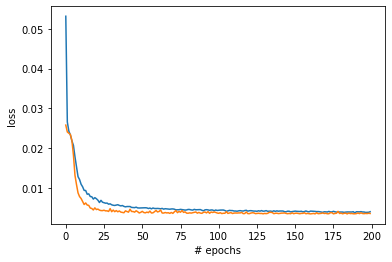

In [35]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [36]:
predicted_result = model.predict(test_data)
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

42/42 [==============================] - 0s 2ms/step
actual: [[0.01758499 0.26260258 0.09378664 0.02461899 0.23681125 0.01758499
  0.70339977 0.36225088 0.45017585 0.33997655]]
predicted: [[0.03148305 0.2744187  0.08390604 0.04376917 0.22632895 0.02663399
  0.65183794 0.2453622  0.42381504 0.3099234 ]]


In [37]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[ 1.6 22.5  8.1  2.2 20.3  1.6 60.1 31.  38.5 29.1]]
predicted inverse scaled: [[ 2.7855046 23.507915   7.2571855  3.83351   19.405859   2.3718796
  55.701775  21.029396  36.251423  26.536467 ]]


# Save all the models

In [38]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']